In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from datetime import datetime


CSV_FILENAME = os.path.expanduser('~/Documents/CS599/CS599_Project/merged_data_Baby.csv')
RATING_COL = 'rating' # Column 1
TIME_COL = 'timestamp'     # Column 2 (Unix Timestamp)

print(f"Set data file path to: {CSV_FILENAME}")
print("Please ensure your file exists at this path before running the next cell.")



Set data file path to: /Users/jeffrey/Documents/CS599/CS599_Project/merged_data_Baby.csv
Please ensure your file exists at this path before running the next cell.


In [13]:
try:
    df = pd.read_csv(CSV_FILENAME)

    # **FIX/DIAGNOSTIC STEP:** Clean column names (remove leading/trailing whitespace)
    # This helps resolve KeyErrors caused by columns like 'time '
    df.columns = df.columns.str.strip()
    
    # 2. Convert Unix Timestamp (milliseconds) to datetime objects
    # CHANGED unit='s' to unit='ms' to handle the "out of bounds" error
    df[TIME_COL] = pd.to_datetime(df[TIME_COL], unit='ms')
    
    print("--- Data Structure ---")
    print(df.info())
    
    print("\n--- Available Columns in CSV (After Cleaning) ---")
    print(list(df.columns))

    print("\n--- First 5 Rows ---")
    print(df.head())

except FileNotFoundError:
    print(f"ERROR: The file '{CSV_FILENAME}' was not found. Please verify the file path and name.")
except KeyError as e:
    # If the column name still isn't found, we report the key used in the code
    print(f"\nERROR: Column {e} was not found in the CSV.")
    print("Please check the column list above to see the correct name for your time data.")
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")


--- Data Structure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6028954 entries, 0 to 6028953
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   title           object        
 1   average_rating  float64       
 2   rating_number   int64         
 3   price           float64       
 4   parent_asin     object        
 5   rating          float64       
 6   timestamp       datetime64[ns]
 7   helpful_vote    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 368.0+ MB
None

--- Available Columns in CSV (After Cleaning) ---
['title', 'average_rating', 'rating_number', 'price', 'parent_asin', 'rating', 'timestamp', 'helpful_vote']

--- First 5 Rows ---
                              title  average_rating  rating_number  price  \
0  Chicco Viaro Travel System, Teak             4.6            125    NaN   
1  Chicco Viaro Travel System, Teak             4.6            125    NaN   
2  Ch

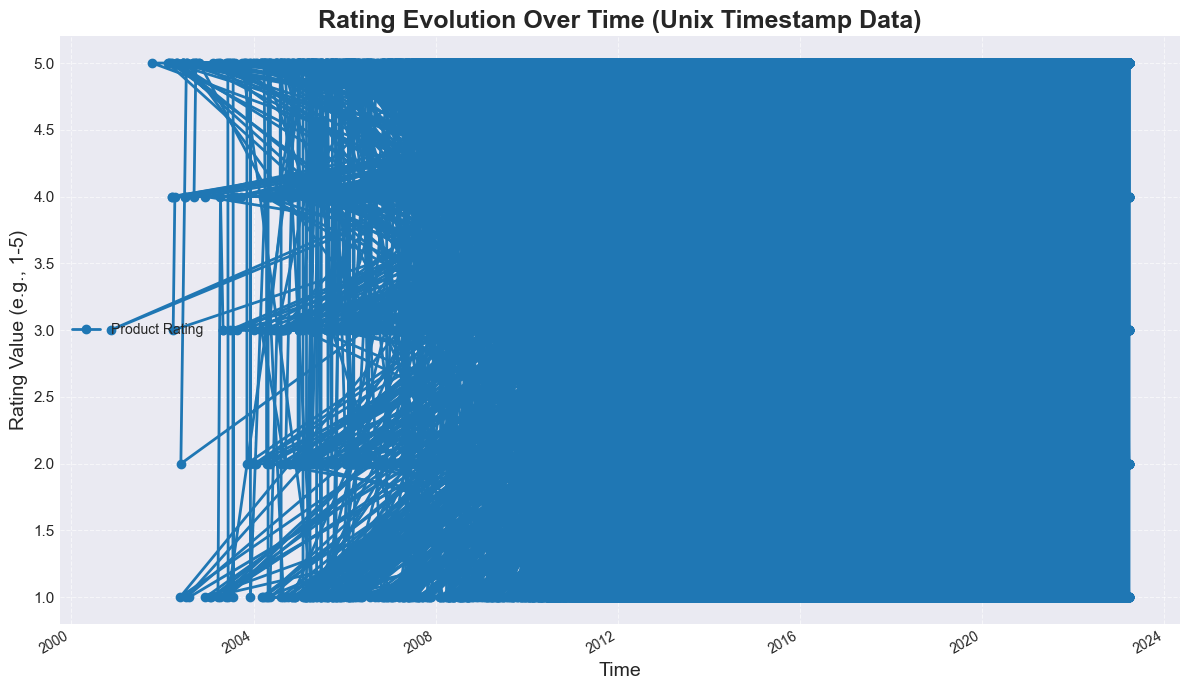

In [12]:
try:
    if 'df' in locals() and not df.empty:
        # FIX for OverflowError with many data points
        # This increases the chunk size for rendering long lines, preventing the error.
        import matplotlib as mpl
        mpl.rcParams['agg.path.chunksize'] = 10000 
        
        plt.style.use('seaborn-v0_8-darkgrid')
        
        plt.figure(figsize=(12, 7)) # Larger figure for better visibility
        
        # Plot the data
        plt.plot(
            df[TIME_COL], 
            df[RATING_COL], 
            marker='o',         # Use circles for data points
            linestyle='-', 
            color='#1f77b4', 
            linewidth=2,
            label='Product Rating'
        )
        
        # Add labels and title
        plt.title('Rating Evolution Over Time (Unix Timestamp Data)', fontsize=18, fontweight='bold')
        plt.xlabel('Time', fontsize=14)
        plt.ylabel('Rating Value (e.g., 1-5)', fontsize=14)
        
        # Customize ticks and grid
        plt.xticks(rotation=45, ha='right') # Rotate dates for better fit
        plt.yticks(fontsize=11)
        
        # Format the x-axis to show dates nicely
        plt.gcf().autofmt_xdate()
        
        # Add legend and annotation
        plt.legend(loc='best')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        plt.tight_layout() # Adjust plot to fit labels
        plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Check previous cell output for errors.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")



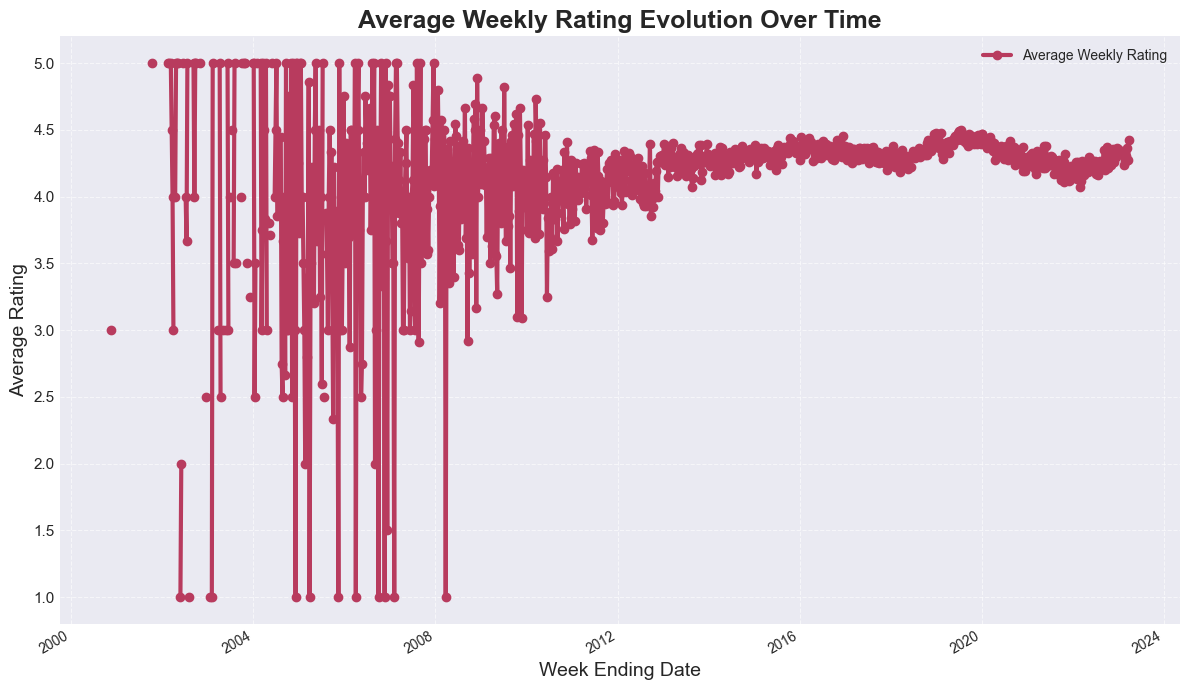

In [13]:
try:
    if 'df' in locals() and not df.empty:
        # 1. Aggregate the data by week (resampling)
        # Set the time column as the index, resample by week ('W'), and calculate the mean rating.
        df_weekly = df.set_index(TIME_COL)[RATING_COL].resample('W').mean().reset_index()

        # FIX for OverflowError with many data points
        # This increases the chunk size for rendering long lines, preventing the error.
        import matplotlib as mpl
        mpl.rcParams['agg.path.chunksize'] = 10000 
        
        plt.style.use('seaborn-v0_8-darkgrid')
        
        plt.figure(figsize=(12, 7)) # Larger figure for better visibility
        
        # Plot the aggregated data
        plt.plot(
            df_weekly[TIME_COL], 
            df_weekly[RATING_COL], 
            marker='o',         # Use circles for data points
            linestyle='-', 
            color='#b83b5e',    # Changed color for visual distinction
            linewidth=3,
            label='Average Weekly Rating'
        )
        
        # Add labels and title
        plt.title('Average Weekly Rating Evolution Over Time', fontsize=18, fontweight='bold')
        plt.xlabel('Week Ending Date', fontsize=14)
        plt.ylabel('Average Rating', fontsize=14)
        
        # Customize ticks and grid
        plt.xticks(rotation=45, ha='right') # Rotate dates for better fit
        plt.yticks(fontsize=11)
        
        # Format the x-axis to show dates nicely
        plt.gcf().autofmt_xdate()
        
        # Add legend and annotation
        plt.legend(loc='best')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        plt.tight_layout() # Adjust plot to fit labels
        plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Check previous cell output for errors.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")


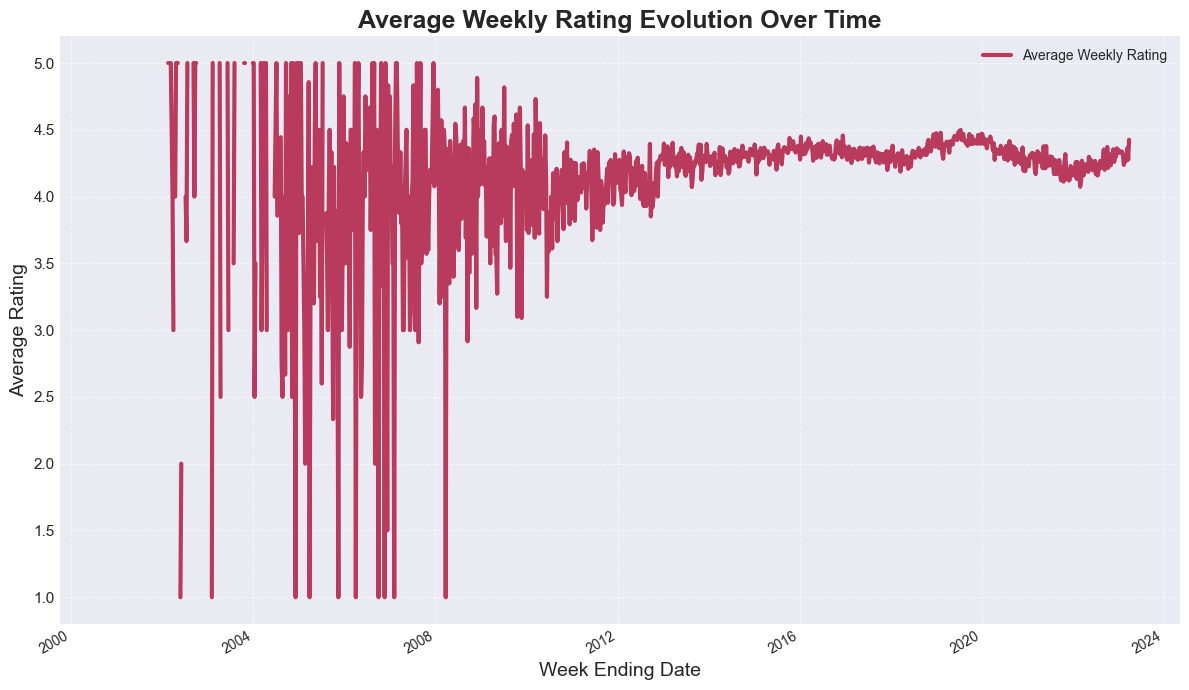

In [14]:
try:
    if 'df' in locals() and not df.empty:
        # 1. Aggregate the data by week (resampling)
        # Set the time column as the index, resample by week ('W'), and calculate the mean rating.
        df_weekly = df.set_index(TIME_COL)[RATING_COL].resample('W').mean().reset_index()

        # FIX for OverflowError with many data points
        # This increases the chunk size for rendering long lines, preventing the error.
        import matplotlib as mpl
        mpl.rcParams['agg.path.chunksize'] = 10000 
        
        plt.style.use('seaborn-v0_8-darkgrid')
        
        plt.figure(figsize=(12, 7)) # Larger figure for better visibility
        
        # Plot the aggregated data
        plt.plot(
            df_weekly[TIME_COL], 
            df_weekly[RATING_COL], 
            marker='',          # REMOVED markers for a cleaner line graph
            linestyle='-', 
            color='#b83b5e',    # Changed color for visual distinction
            linewidth=3,
            label='Average Weekly Rating'
        )
        
        # Add labels and title
        plt.title('Average Weekly Rating Evolution Over Time', fontsize=18, fontweight='bold')
        plt.xlabel('Week Ending Date', fontsize=14)
        plt.ylabel('Average Rating', fontsize=14)
        
        # Customize ticks and grid
        plt.xticks(rotation=45, ha='right') # Rotate dates for better fit
        plt.yticks(fontsize=11)
        
        # Format the x-axis to show dates nicely
        plt.gcf().autofmt_xdate()
        
        # Add legend and annotation
        plt.legend(loc='best')
        plt.grid(True, linestyle='--', alpha=0.6)
        
        plt.tight_layout() # Adjust plot to fit labels
        plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Check previous cell output for errors.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")


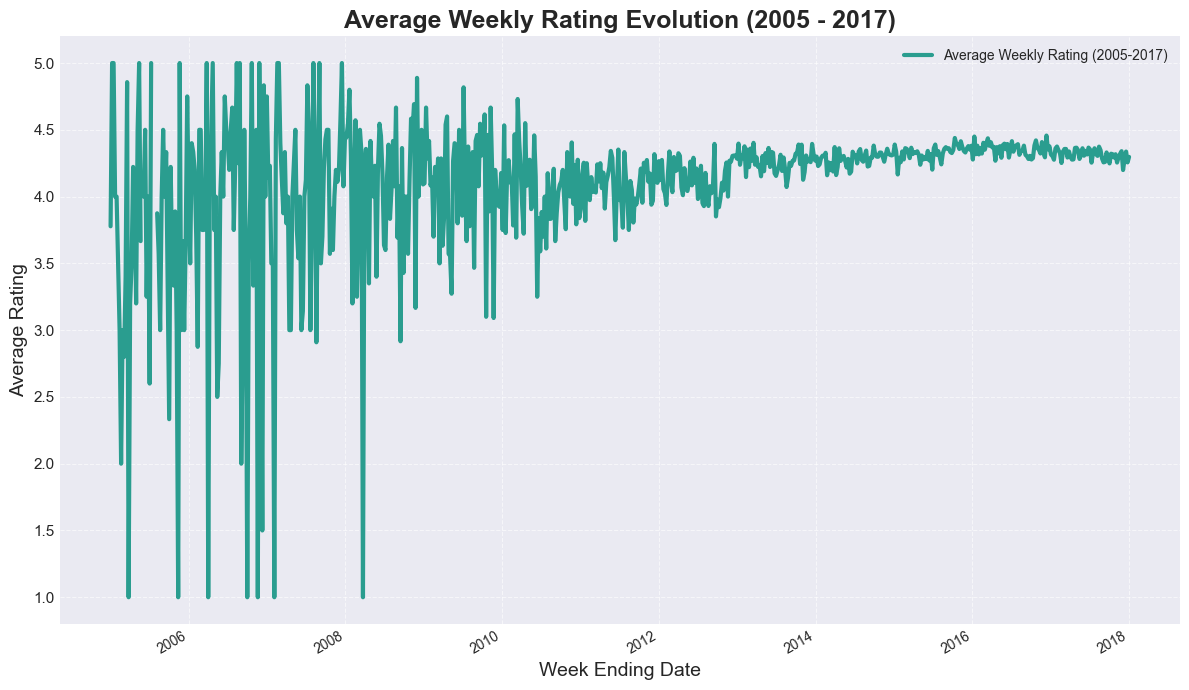

In [15]:
try:
    if 'df' in locals() and not df.empty:
        # Define the filter boundaries
        start_date = '2005-01-01'
        end_date = '2017-12-31'
        
        # 1. Filter the DataFrame using the time column
        df_filtered = df[(df[TIME_COL] >= start_date) & (df[TIME_COL] <= end_date)]
        
        # Check if any data exists in the filtered range
        if df_filtered.empty:
            print(f"No data found between {start_date} and {end_date}. Cannot plot.")
        else:
            # 2. Aggregate the filtered data by week
            df_filtered_weekly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('W').mean().reset_index()

            # FIX for OverflowError (carried forward for robustness)
            import matplotlib as mpl
            mpl.rcParams['agg.path.chunksize'] = 10000 
            
            plt.style.use('seaborn-v0_8-darkgrid')
            
            plt.figure(figsize=(12, 7))
            
            # Plot the aggregated data
            plt.plot(
                df_filtered_weekly[TIME_COL], 
                df_filtered_weekly[RATING_COL], 
                marker='',
                linestyle='-', 
                color='#2a9d8f', # Use a new color for distinction (Teal)
                linewidth=3,
                label=f'Average Weekly Rating ({start_date[:4]}-{end_date[:4]})'
            )
            
            # Add labels and title
            plt.title(f'Average Weekly Rating Evolution ({start_date[:4]} - {end_date[:4]})', fontsize=18, fontweight='bold')
            plt.xlabel('Week Ending Date', fontsize=14)
            plt.ylabel('Average Rating', fontsize=14)
            
            # Customize ticks and grid
            plt.xticks(rotation=45, ha='right')
            plt.yticks(fontsize=11)
            
            plt.gcf().autofmt_xdate()
            
            # Add legend and annotation
            plt.legend(loc='best')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            plt.tight_layout()
            plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure Cell 2 ran successfully.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")


/var/folders/b7/42nf91qx587_0y16h6v0_s1r0000gn/T/ipykernel_27367/1815104224.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()


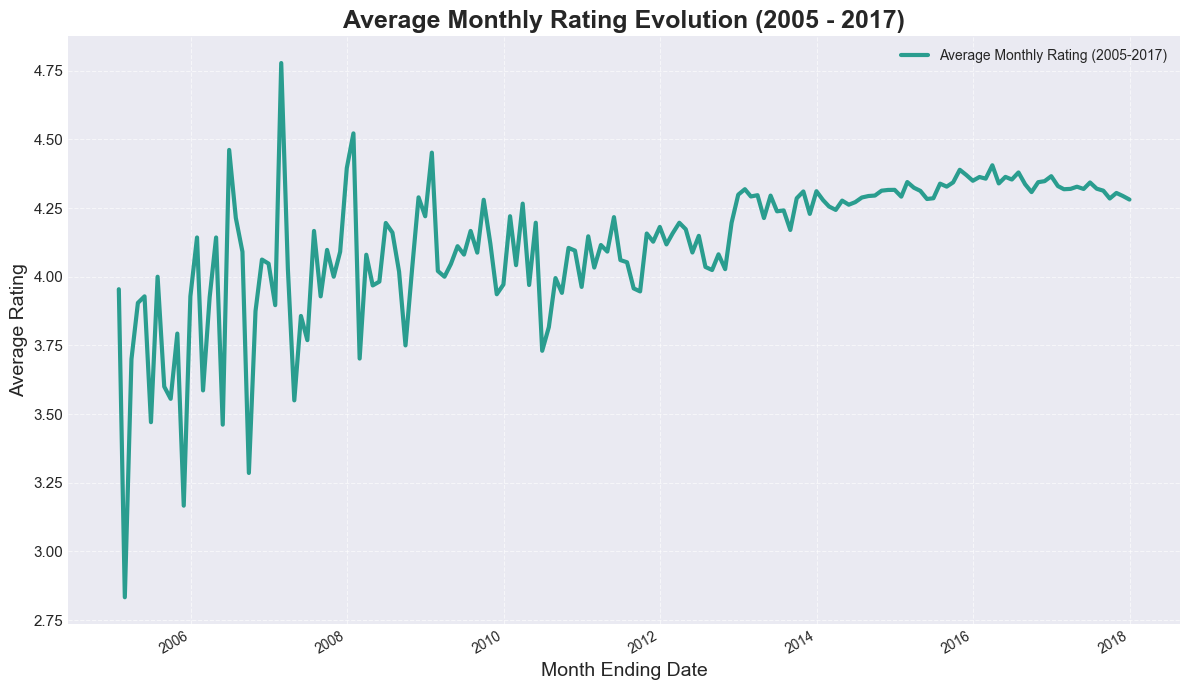

In [16]:
try:
    if 'df' in locals() and not df.empty:
        # Define the filter boundaries
        start_date = '2005-01-01'
        end_date = '2017-12-31'
        
        # 1. Filter the DataFrame using the time column
        df_filtered = df[(df[TIME_COL] >= start_date) & (df[TIME_COL] <= end_date)]
        
        # Check if any data exists in the filtered range
        if df_filtered.empty:
            print(f"No data found between {start_date} and {end_date}. Cannot plot.")
        else:
            # 2. Aggregate the filtered data by month ('M')
            df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()

            # FIX for OverflowError (carried forward for robustness)
            import matplotlib as mpl
            mpl.rcParams['agg.path.chunksize'] = 10000 
            
            plt.style.use('seaborn-v0_8-darkgrid')
            
            plt.figure(figsize=(12, 7))
            
            # Plot the aggregated data
            plt.plot(
                df_filtered_monthly[TIME_COL], 
                df_filtered_monthly[RATING_COL], 
                marker='',
                linestyle='-', 
                color='#2a9d8f', # Use a new color for distinction (Teal)
                linewidth=3,
                label=f'Average Monthly Rating ({start_date[:4]}-{end_date[:4]})'
            )
            
            # Add labels and title
            plt.title(f'Average Monthly Rating Evolution ({start_date[:4]} - {end_date[:4]})', fontsize=18, fontweight='bold')
            plt.xlabel('Month Ending Date', fontsize=14)
            plt.ylabel('Average Rating', fontsize=14)
            
            # Customize ticks and grid
            plt.xticks(rotation=45, ha='right')
            plt.yticks(fontsize=11)
            
            plt.gcf().autofmt_xdate()
            
            # Add legend and annotation
            plt.legend(loc='best')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            plt.tight_layout()
            plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure Cell 2 ran successfully.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")


/var/folders/b7/42nf91qx587_0y16h6v0_s1r0000gn/T/ipykernel_27367/3364281216.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()


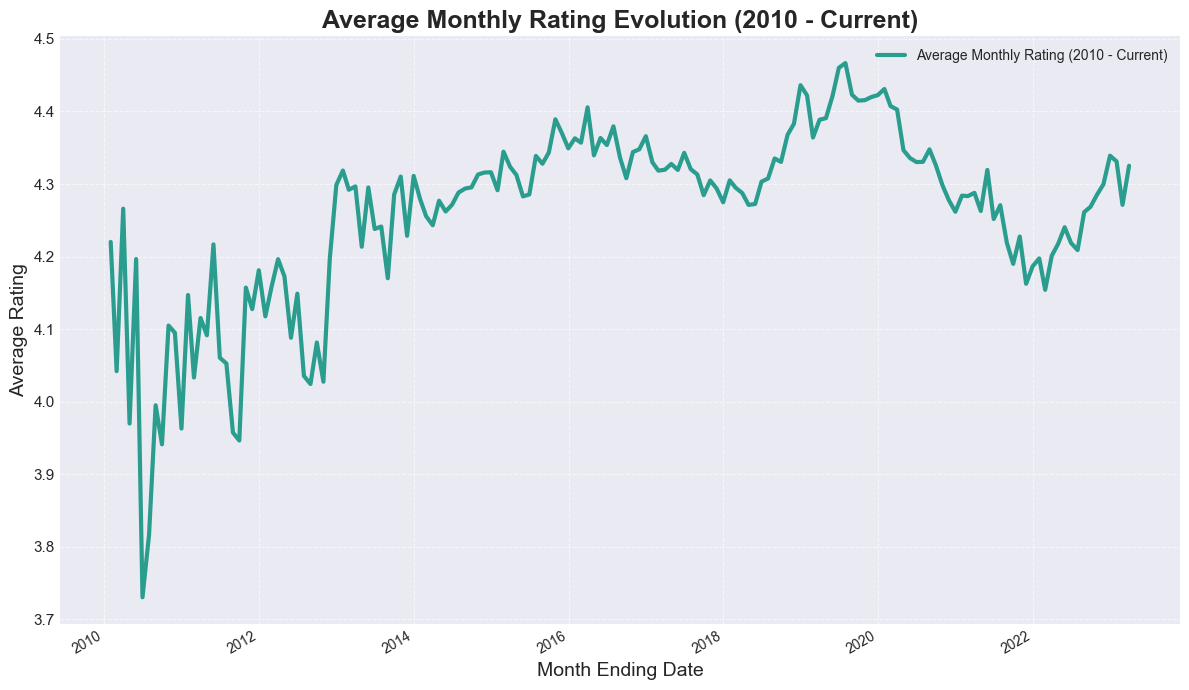

In [17]:
try:
    if 'df' in locals() and not df.empty:
        # Define the filter boundaries: 2010-01-01 to a future date to include all current data
        start_date = '2010-01-01'
        # Set end date far into the future to capture all current data
        end_date = '2100-01-01' 
        
        # 1. Filter the DataFrame using the time column
        df_filtered = df[(df[TIME_COL] >= start_date) & (df[TIME_COL] <= end_date)]
        
        # Check if any data exists in the filtered range
        if df_filtered.empty:
            print(f"No data found between {start_date} and current time. Cannot plot.")
        else:
            # 2. Aggregate the filtered data by month ('M')
            df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()

            # FIX for OverflowError (carried forward for robustness)
            import matplotlib as mpl
            mpl.rcParams['agg.path.chunksize'] = 10000 
            
            plt.style.use('seaborn-v0_8-darkgrid')
            
            plt.figure(figsize=(12, 7))
            
            # Plot the aggregated data
            plt.plot(
                df_filtered_monthly[TIME_COL], 
                df_filtered_monthly[RATING_COL], 
                marker='',
                linestyle='-', 
                color='#2a9d8f', # Use a new color for distinction (Teal)
                linewidth=3,
                label=f'Average Monthly Rating (2010 - Current)'
            )
            
            # Add labels and title
            plt.title(f'Average Monthly Rating Evolution (2010 - Current)', fontsize=18, fontweight='bold')
            plt.xlabel('Month Ending Date', fontsize=14)
            plt.ylabel('Average Rating', fontsize=14)
            
            # Customize ticks and grid
            plt.xticks(rotation=45, ha='right')
            plt.yticks(fontsize=11)
            
            plt.gcf().autofmt_xdate()
            
            # Add legend and annotation
            plt.legend(loc='best')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            plt.tight_layout()
            plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure Cell 2 ran successfully.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")


/var/folders/b7/42nf91qx587_0y16h6v0_s1r0000gn/T/ipykernel_53203/456010934.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()


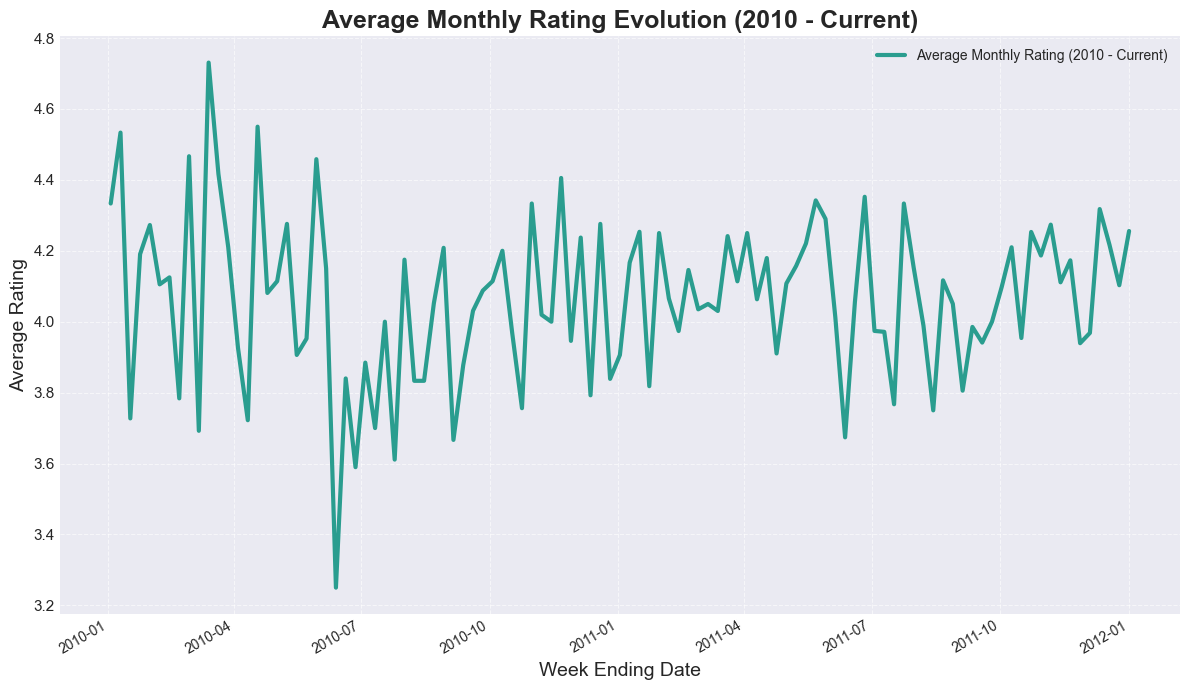

In [9]:
try:
    if 'df' in locals() and not df.empty:
        # Define the filter boundaries: 2010-01-01 to a future date to include all current data
        start_date = '2010-01-01'
        # Set end date far into the future to capture all current data
        end_date = '2012-01-01' 
        
        # 1. Filter the DataFrame using the time column
        df_filtered = df[(df[TIME_COL] >= start_date) & (df[TIME_COL] <= end_date)]
        
        # Check if any data exists in the filtered range
        if df_filtered.empty:
            print(f"No data found between {start_date} and current time. Cannot plot.")
        else:
            # 2. Aggregate the filtered data by month ('M')
            df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()
            df_filtered_weekly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('W').mean().reset_index()

            # FIX for OverflowError (carried forward for robustness)
            import matplotlib as mpl
            mpl.rcParams['agg.path.chunksize'] = 10000 
            
            plt.style.use('seaborn-v0_8-darkgrid')
            
            plt.figure(figsize=(12, 7))
            
            # Plot the aggregated data
            plt.plot(
                # df_filtered_monthly[TIME_COL], 
                # df_filtered_monthly[RATING_COL], 
                df_filtered_weekly[TIME_COL], 
                df_filtered_weekly[RATING_COL], 
                marker='',
                linestyle='-', 
                color='#2a9d8f', # Use a new color for distinction (Teal)
                linewidth=3,
                label=f'Average Monthly Rating (2010 - Current)'
            )
            
            # Add labels and title
            plt.title(f'Average Monthly Rating Evolution (2010 - Current)', fontsize=18, fontweight='bold')
            plt.xlabel('Week Ending Date', fontsize=14)
            plt.ylabel('Average Rating', fontsize=14)
            
            # Customize ticks and grid
            plt.xticks(rotation=45, ha='right')
            plt.yticks(fontsize=11)
            
            plt.gcf().autofmt_xdate()
            
            # Add legend and annotation
            plt.legend(loc='best')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            plt.tight_layout()
            plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure Cell 2 ran successfully.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")

/var/folders/b7/42nf91qx587_0y16h6v0_s1r0000gn/T/ipykernel_3296/2806825632.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()


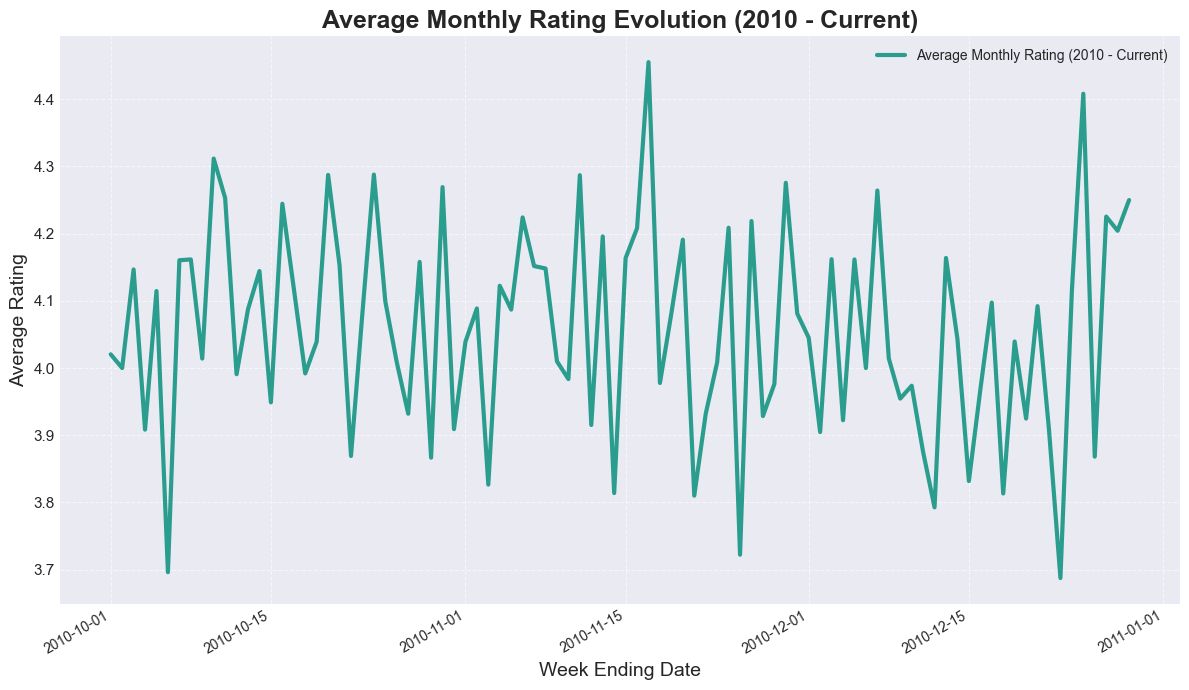

In [14]:
try:
    if 'df' in locals() and not df.empty:
        # Define the filter boundaries: 2010-01-01 to a future date to include all current data
        start_date = '2010-10-01'
        # Set end date far into the future to capture all current data
        end_date = '2010-12-30' 
        
        # 1. Filter the DataFrame using the time column
        df_filtered = df[(df[TIME_COL] >= start_date) & (df[TIME_COL] <= end_date)]
        
        # Check if any data exists in the filtered range
        if df_filtered.empty:
            print(f"No data found between {start_date} and current time. Cannot plot.")
        else:
            # 2. Aggregate the filtered data by month ('M')
            df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()
            df_filtered_weekly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('W').mean().reset_index()
            df_filtered_daily = df_filtered.set_index(TIME_COL)[RATING_COL].resample('D').mean().reset_index()
            # FIX for OverflowError (carried forward for robustness)
            import matplotlib as mpl
            mpl.rcParams['agg.path.chunksize'] = 10000 
            
            plt.style.use('seaborn-v0_8-darkgrid')
            
            plt.figure(figsize=(12, 7))
            
            # Plot the aggregated data
            plt.plot(
                # df_filtered_monthly[TIME_COL], 
                # df_filtered_monthly[RATING_COL], 
                # df_filtered_weekly[TIME_COL], 
                # df_filtered_weekly[RATING_COL], 
                df_filtered_daily[TIME_COL], 
                df_filtered_daily[RATING_COL], 
                marker='',
                linestyle='-', 
                color='#2a9d8f', # Use a new color for distinction (Teal)
                linewidth=3,
                label=f'Average Monthly Rating (2010 - Current)'
            )
            
            # Add labels and title
            plt.title(f'Average Monthly Rating Evolution (2010 - Current)', fontsize=18, fontweight='bold')
            plt.xlabel('Week Ending Date', fontsize=14)
            plt.ylabel('Average Rating', fontsize=14)
            
            # Customize ticks and grid
            plt.xticks(rotation=45, ha='right')
            plt.yticks(fontsize=11)
            
            plt.gcf().autofmt_xdate()
            
            # Add legend and annotation
            plt.legend(loc='best')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            plt.tight_layout()
            plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure Cell 2 ran successfully.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")

/var/folders/b7/42nf91qx587_0y16h6v0_s1r0000gn/T/ipykernel_3296/3146103635.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()


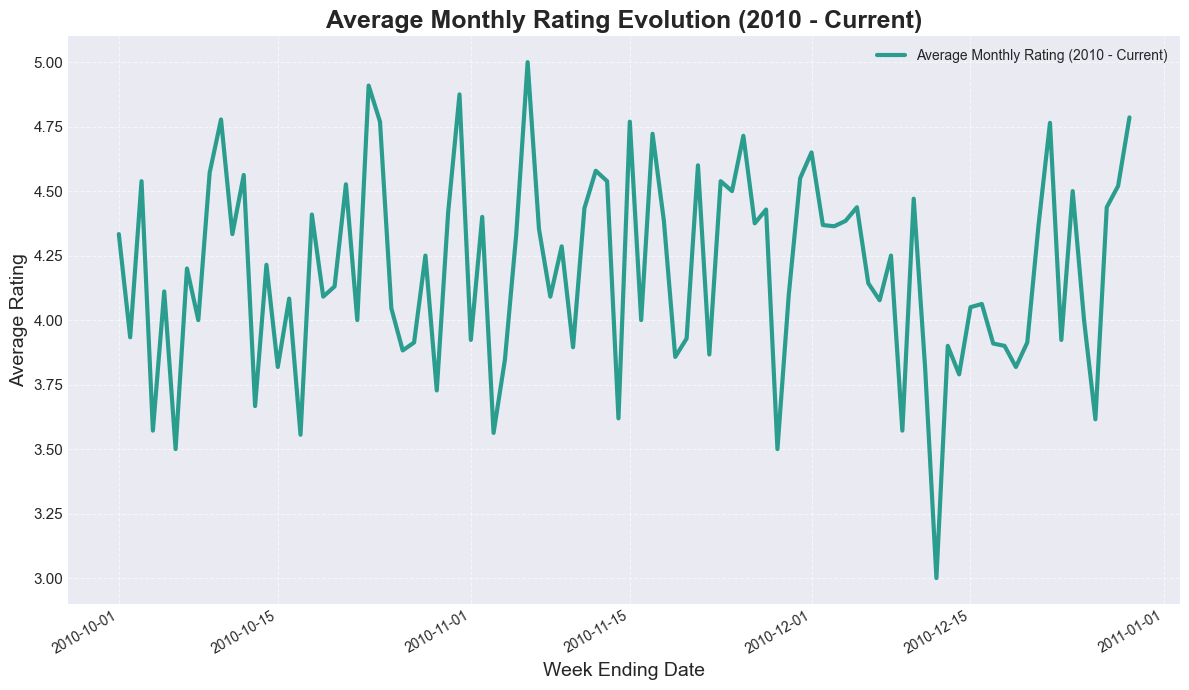

In [17]:

try:
    if 'df' in locals() and not df.empty:

        DIAPER_TITLE_COL = 'title' # Assuming the column is named 'title'
        df_filtered_by_title = df[df[DIAPER_TITLE_COL].astype(str).str.contains('diaper', case=False, na=False)]
        # Define the filter boundaries: 2010-01-01 to a future date to include all current data
        start_date = '2010-10-01'
        # Set end date far into the future to capture all current data
        end_date = '2010-12-30' 
        
        # 1. Filter the DataFrame using the time column
        #df_filtered = df[(df[TIME_COL] >= start_date) & (df[TIME_COL] <= end_date)]

        df_filtered = df_filtered_by_title[
                (df_filtered_by_title[TIME_COL] >= start_date) & 
                (df_filtered_by_title[TIME_COL] <= end_date)
            ]
        
        # Check if any data exists in the filtered range
        if df_filtered.empty:
            print(f"No data found between {start_date} and current time. Cannot plot.")
        else:
            # 2. Aggregate the filtered data by month ('M')
            df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()
            df_filtered_weekly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('W').mean().reset_index()
            df_filtered_daily = df_filtered.set_index(TIME_COL)[RATING_COL].resample('D').mean().reset_index()
        


            # FIX for OverflowError (carried forward for robustness)
            import matplotlib as mpl
            mpl.rcParams['agg.path.chunksize'] = 10000 
            
            plt.style.use('seaborn-v0_8-darkgrid')
            
            plt.figure(figsize=(12, 7))
            
            # Plot the aggregated data
            plt.plot(
                # df_filtered_monthly[TIME_COL], 
                # df_filtered_monthly[RATING_COL], 
                # df_filtered_weekly[TIME_COL], 
                # df_filtered_weekly[RATING_COL], 
                df_filtered_daily[TIME_COL], 
                df_filtered_daily[RATING_COL], 
                marker='',
                linestyle='-', 
                color='#2a9d8f', # Use a new color for distinction (Teal)
                linewidth=3,
                label=f'Average Monthly Rating (2010 - Current)'
            )
            
            # Add labels and title
            plt.title(f'Average Monthly Rating Evolution (2010 - Current)', fontsize=18, fontweight='bold')
            plt.xlabel('Week Ending Date', fontsize=14)
            plt.ylabel('Average Rating', fontsize=14)
            
            # Customize ticks and grid
            plt.xticks(rotation=45, ha='right')
            plt.yticks(fontsize=11)
            
            plt.gcf().autofmt_xdate()
            
            # Add legend and annotation
            plt.legend(loc='best')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            plt.tight_layout()
            plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure Cell 2 ran successfully.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")

/var/folders/b7/42nf91qx587_0y16h6v0_s1r0000gn/T/ipykernel_3296/180522046.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()


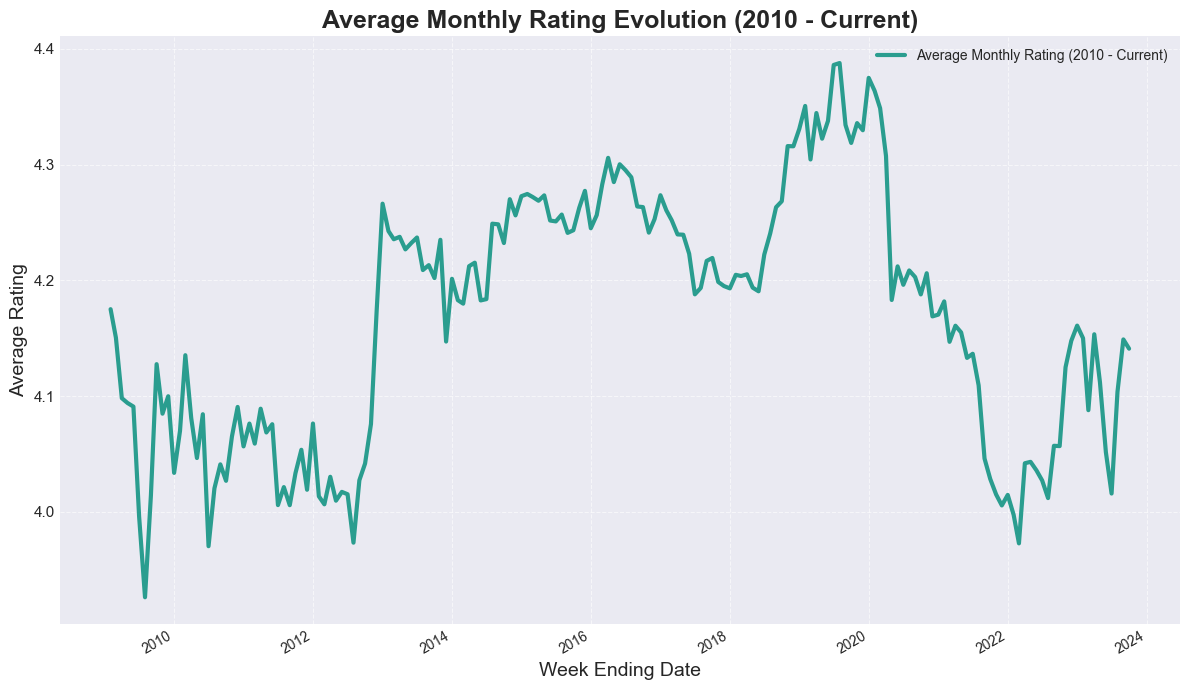

In [21]:

try:
    if 'df' in locals() and not df.empty:

        #DIAPER_TITLE_COL = 'title' # Assuming the column is named 'title'
        #df_filtered_by_title = df[df[DIAPER_TITLE_COL].astype(str).str.contains('diaper', case=False, na=False)]
        # Define the filter boundaries: 2010-01-01 to a future date to include all current data
        start_date = '2009-01-01'
        # Set end date far into the future to capture all current data
        end_date = '2025-12-30' 
        
        # 1. Filter the DataFrame using the time column
        df_filtered = df[(df[TIME_COL] >= start_date) & (df[TIME_COL] <= end_date)]

        # df_filtered = df_filtered_by_title[
        #         (df_filtered_by_title[TIME_COL] >= start_date) & 
        #         (df_filtered_by_title[TIME_COL] <= end_date)
        #     ]
        
        # Check if any data exists in the filtered range
        if df_filtered.empty:
            print(f"No data found between {start_date} and current time. Cannot plot.")
        else:
            # 2. Aggregate the filtered data by month ('M')
            df_filtered_monthly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').mean().reset_index()
            # df_filtered_weekly = df_filtered.set_index(TIME_COL)[RATING_COL].resample('W').mean().reset_index()
            # df_filtered_daily = df_filtered.set_index(TIME_COL)[RATING_COL].resample('D').mean().reset_index()
        


            # FIX for OverflowError (carried forward for robustness)
            import matplotlib as mpl
            mpl.rcParams['agg.path.chunksize'] = 10000 
            
            plt.style.use('seaborn-v0_8-darkgrid')
            
            plt.figure(figsize=(12, 7))
            
            # Plot the aggregated data
            plt.plot(
                df_filtered_monthly[TIME_COL], 
                df_filtered_monthly[RATING_COL], 
                # df_filtered_weekly[TIME_COL], 
                # df_filtered_weekly[RATING_COL], 
                # df_filtered_daily[TIME_COL], 
                # df_filtered_daily[RATING_COL], 
                marker='',
                linestyle='-', 
                color='#2a9d8f', # Use a new color for distinction (Teal)
                linewidth=3,
                label=f'Average Monthly Rating (2010 - Current)'
            )
            
            # Add labels and title
            plt.title(f'Average Monthly Rating Evolution (2010 - Current)', fontsize=18, fontweight='bold')
            plt.xlabel('Week Ending Date', fontsize=14)
            plt.ylabel('Average Rating', fontsize=14)
            
            # Customize ticks and grid
            plt.xticks(rotation=45, ha='right')
            plt.yticks(fontsize=11)
            
            plt.gcf().autofmt_xdate()
            
            # Add legend and annotation
            plt.legend(loc='best')
            plt.grid(True, linestyle='--', alpha=0.6)
            
            plt.tight_layout()
            plt.show()

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure Cell 2 ran successfully.")
        
except Exception as e:
    print(f"An error occurred during plotting: {e}")

/var/folders/b7/42nf91qx587_0y16h6v0_s1r0000gn/T/ipykernel_3296/2758680385.py:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_agg = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').agg(['mean', 'count']).reset_index()


Plot saved as 'diaper_daily_rating_count_evolution.png'.


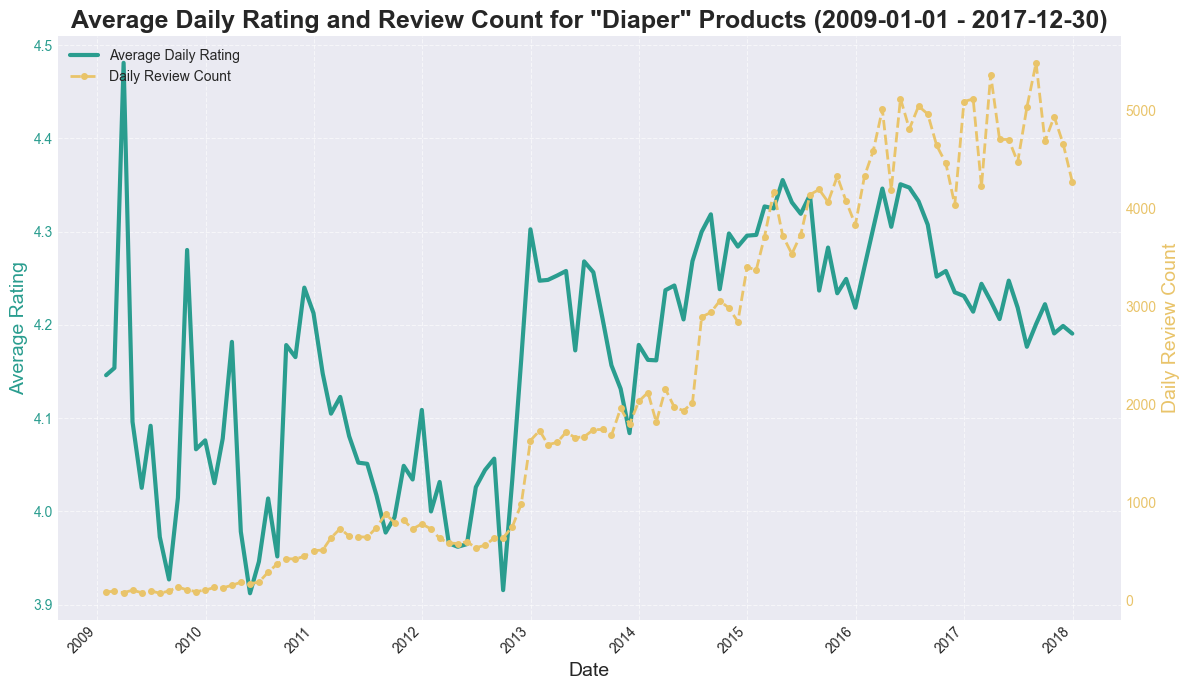

In [28]:

try:
    # --- Assuming TIME_COL and RATING_COL are defined elsewhere, e.g.: ---
    # TIME_COL = 'review_date' 
    # RATING_COL = 'overall_rating'
    # ---------------------------------------------------------------------

    if 'df' in locals() and not df.empty:
        # **Filter by 'title' containing 'diaper'**
        DIAPER_TITLE_COL = 'title'
        df_filtered_by_title = df[df[DIAPER_TITLE_COL].astype(str).str.contains('diaper', case=False, na=False)]

        if df_filtered_by_title.empty:
            print("No data found where the 'title' column contains 'diaper'. Cannot plot.")
        else:
            # Define the filter boundaries: 2010-10-01 to 2010-12-30
            start_date = '2009-01-01'
            end_date = '2017-12-30' 
            
            # 1. Filter the DataFrame using the time column
            df_filtered = df_filtered_by_title[
                (df_filtered_by_title[TIME_COL] >= start_date) & 
                (df_filtered_by_title[TIME_COL] <= end_date)
            ]

            if df_filtered.empty:
                print(f"No data found with 'diaper' in title between {start_date} and {end_date}. Cannot plot.")
            else:
                # # 2. Aggregate the filtered data daily ('D') using .agg() for both mean (rating) and count (reviews)
                # df_daily_agg = df_filtered.set_index(TIME_COL)[RATING_COL].resample('D').agg(['mean', 'count']).reset_index()
                
                # # Rename the aggregated columns for clarity
                # df_daily_agg.rename(columns={'mean': 'Average_Rating', 'count': 'review_count'}, inplace=True)
                

                df_monthly_agg = df_filtered.set_index(TIME_COL)[RATING_COL].resample('M').agg(['mean', 'count']).reset_index()
                
                # Rename the aggregated columns for clarity
                df_monthly_agg.rename(columns={'mean': 'Average_Rating', 'count': 'review_count'}, inplace=True)



                # df_daily_agg = df_filtered.set_index(TIME_COL)[RATING_COL].resample('D').agg(['mean', 'count']).reset_index()
                
                # # Rename the aggregated columns for clarity
                # df_daily_agg.rename(columns={'mean': 'Average_Rating', 'count': 'review_count'}, inplace=True)


                # FIX for OverflowError (carried forward for robustness)
                mpl.rcParams['agg.path.chunksize'] = 10000 
                
                plt.style.use('seaborn-v0_8-darkgrid')
                
                # Create figure and primary axes (ax1)
                fig, ax1 = plt.subplots(figsize=(12, 7))
                
                # --- Plot 1: Average Rating (Primary Y-axis, left) ---
                color1 = '#2a9d8f' # Teal for rating
                ax1.set_xlabel('Date', fontsize=14)
                ax1.set_ylabel('Average Rating', color=color1, fontsize=14)
                
                line1, = ax1.plot(
                    # df_daily_agg[TIME_COL], 
                    # df_daily_agg['Average_Rating'],
                    df_monthly_agg[TIME_COL], 
                    df_monthly_agg['Average_Rating'],
                    marker='',
                    linestyle='-', 
                    color=color1,
                    linewidth=3,
                    label=f'Average Daily Rating'
                )
                ax1.tick_params(axis='y', labelcolor=color1)
                
                # --- Plot 2: Review Count (Secondary Y-axis, right) ---
                ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
                color2 = '#e9c46a' # Yellow/Orange for count
                ax2.set_ylabel('Monthly Review Count', color=color2, fontsize=14)
                
                line2, = ax2.plot(
                    # df_daily_agg[TIME_COL], 
                    # df_daily_agg['review_count'], 
                    df_monthly_agg[TIME_COL], 
                    df_monthly_agg['review_count'], 
                    marker='o',
                    markersize=4,
                    linestyle='--',
                    color=color2,
                    linewidth=2,
                    label='Monthly Review Count'
                )
                ax2.tick_params(axis='y', labelcolor=color2)
                
                # --- Final Plot Customization ---
                
                # Title
                plt.title(f'Average Monthly Rating and Review Count for "Diaper" Products ({start_date} - {end_date})', fontsize=18, fontweight='bold')
                
                # Ticks and Autoformat
                fig.autofmt_xdate(rotation=45, ha='right')
                
                # Legends (Combine legends from both axes)
                lines = [line1, line2]
                labels = [l.get_label() for l in lines]
                ax1.legend(lines, labels, loc='upper left')
                
                ax1.grid(True, linestyle='--', alpha=0.6)
                ax2.grid(False) # Avoid double grid lines
                
                plt.tight_layout()
                plt.savefig('diaper_daily_rating_count_evolution.png') # New file name
                print("Plot saved as 'diaper_daily_rating_count_evolution.png'.")

    else:
        print("Cannot plot: DataFrame 'df' is empty or not defined. Ensure data loading ran successfully.")
        
except NameError as ne:
    # Catch specific error if TIME_COL or RATING_COL is not defined
    print(f"A NameError occurred. Ensure TIME_COL and RATING_COL (and 'title' column) are defined and correct: {ne}")
except Exception as e:
    print(f"An unexpected error occurred during plotting: {e}")